In [3]:
# ✅ Import Required Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ✅ Load and Preprocess the Dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print(f"✅ Dataset Loaded. Training Samples: {len(X_train)}, Test Samples: {len(X_test)}")

# ✅ Define the Two-layer Neural Network
class TwoLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Model parameters
input_size = X_train.shape[1]
hidden_size = 10
output_size = len(set(y))

# Initialize model
model = TwoLayerNN(input_size, hidden_size, output_size)
print(model)

# ✅ Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# ✅ Training Function
def train_network(model, X_train, y_train, epochs=100):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# Train the model
train_network(model, X_train_tensor, y_train_tensor)

# ✅ Evaluate the Model
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_labels = torch.argmax(y_pred_test, dim=1)

# Calculate accuracy
accuracy = (y_pred_labels == y_test_tensor).sum


✅ Dataset Loaded. Training Samples: 120, Test Samples: 30
TwoLayerNN(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)
Epoch 0: Loss = 1.1397
Epoch 10: Loss = 1.0314
Epoch 20: Loss = 0.9244
Epoch 30: Loss = 0.8270
Epoch 40: Loss = 0.7617
Epoch 50: Loss = 0.7239
Epoch 60: Loss = 0.6960
Epoch 70: Loss = 0.6675
Epoch 80: Loss = 0.6400
Epoch 90: Loss = 0.6193



✅ Model Accuracy: 1.0000


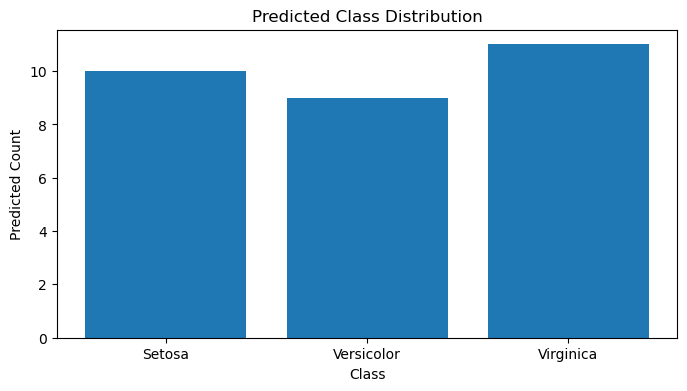

In [5]:
# ✅ Evaluate the Model
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_labels = torch.argmax(y_pred_test, dim=1)

# Calculate accuracy
accuracy = (y_pred_labels == y_test_tensor).sum().item() / len(y_test_tensor)
print(f"\n✅ Model Accuracy: {accuracy:.4f}")

# ✅ Plot Prediction Distribution
plt.figure(figsize=(8, 4))
plt.bar(["Setosa", "Versicolor", "Virginica"], [sum(y_pred_labels == i).item() for i in range(3)])
plt.xlabel("Class")
plt.ylabel("Predicted Count")
plt.title("Predicted Class Distribution")
plt.show()



📋 Classification Report:

              precision  recall  f1-score  support
Setosa              1.0     1.0       1.0     10.0
Versicolor          1.0     1.0       1.0      9.0
Virginica           1.0     1.0       1.0     11.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     30.0
weighted avg        1.0     1.0       1.0     30.0


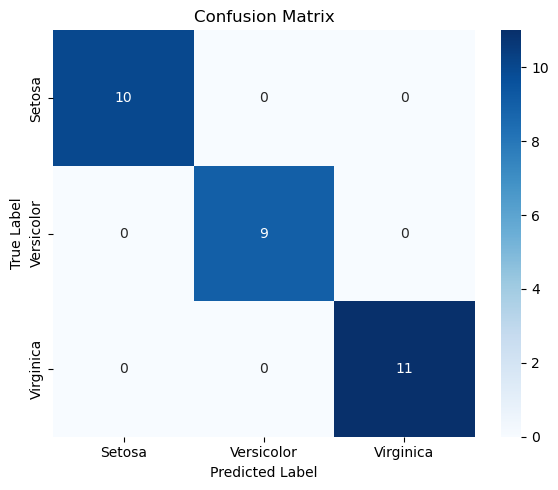

In [9]:
import torch
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Re-evaluate model predictions and generate detailed analysis
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_labels = torch.argmax(y_pred_test, dim=1)

# Classification report
report = classification_report(
    y_test_tensor.numpy(),
    y_pred_labels.numpy(),
    target_names=["Setosa", "Versicolor", "Virginica"],
    output_dict=True
)
report_df = pd.DataFrame(report).transpose()

# Display classification report
print("\n📋 Classification Report:\n")
print(report_df)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_tensor.numpy(), y_pred_labels.numpy())
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=["Setosa", "Versicolor", "Virginica"],
    columns=["Setosa", "Versicolor", "Virginica"]
)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()
